In [82]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [83]:
from sklearn.datasets import load_iris

In [84]:
iris = load_iris()

In [72]:
dir(iris)

['DESCR',
 'data',
 'data_module',
 'feature_names',
 'filename',
 'frame',
 'target',
 'target_names']

In [85]:
df = pd.DataFrame(iris.data, columns = iris.feature_names)

In [86]:
df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [87]:
df['flower'] = iris.target

In [88]:
df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),flower
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


In [89]:
df.drop(['sepal length (cm)', 'sepal width (cm)', 'flower'], axis = 'columns', inplace=True)

In [90]:
df

,petal length (cm),petal width (cm)
0,1.4,0.2
1,1.4,0.2
2,1.3,0.2
3,1.5,0.2
4,1.4,0.2
...,...,...
145,5.2,2.3
146,5.0,1.9
147,5.2,2.0
148,5.4,2.3


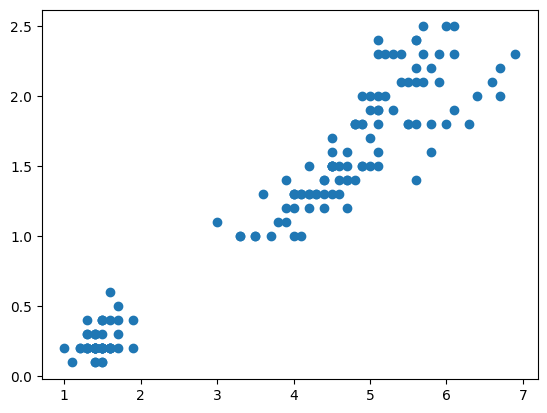

In [21]:
plt.scatter(df['petal length (cm)'], df['petal width (cm)'])

In [23]:
from sklearn.cluster import KMeans

In [24]:
k_means2 = KMeans(n_clusters=2)

In [25]:
k_out2 = k_means2.fit_predict(df)

In [27]:
k_out2

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [29]:
df['cluster2'] = k_out2

In [30]:
df

,petal length (cm),petal width (cm),cluster2
0,1.4,0.2,1
1,1.4,0.2,1
2,1.3,0.2,1
3,1.5,0.2,1
4,1.4,0.2,1
...,...,...,...
145,5.2,2.3,0
146,5.0,1.9,0
147,5.2,2.0,0
148,5.4,2.3,0


In [31]:
k_means2.cluster_centers_

array([[4.92525253, 1.68181818],
       [1.49215686, 0.2627451 ]])

In [32]:
df1 = df[df.cluster2 ==0]
df2= df[df.cluster2 ==1]

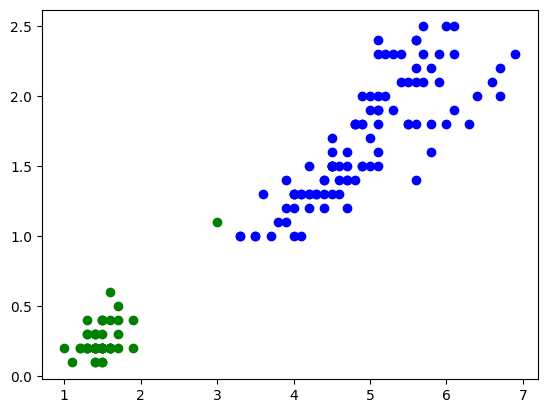

In [33]:
plt.scatter(df1['petal length (cm)'],df1['petal width (cm)'],color='blue')
plt.scatter(df2['petal length (cm)'],df2['petal width (cm)'],color='green')

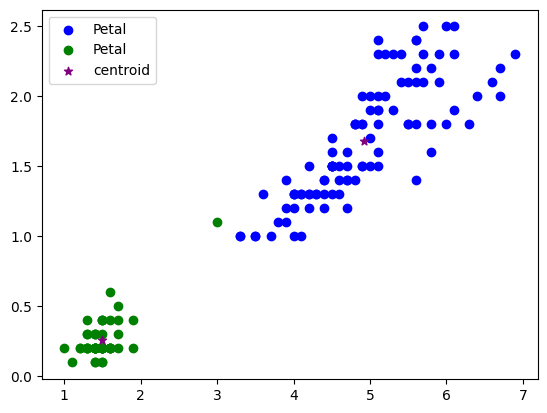

In [35]:
plt.scatter(df1['petal length (cm)'],df1['petal width (cm)'],color='blue', label='Petal')
plt.scatter(df2['petal length (cm)'],df2['petal width (cm)'],color='green', label = 'Petal')
plt.scatter(k_means2.cluster_centers_[:,0], k_means2.cluster_centers_[:, 1], color = 'purple', marker = '*', label = 'centroid')

plt.legend()

In [36]:

from sklearn.preprocessing import MinMaxScaler
scale = MinMaxScaler()

In [37]:
scale.fit(df[['petal length (cm)']])
df['petal length (cm)'] = scale.transform(df[['petal length (cm)']])

In [38]:
scale.fit(df[['petal width (cm)']])
df['petal width (cm)'] = scale.transform(df[['petal width (cm)']])

In [39]:
df

,petal length (cm),petal width (cm),cluster2
0,0.067797,0.041667,1
1,0.067797,0.041667,1
2,0.050847,0.041667,1
3,0.084746,0.041667,1
4,0.067797,0.041667,1
...,...,...,...
145,0.711864,0.916667,0
146,0.677966,0.750000,0
147,0.711864,0.791667,0
148,0.745763,0.916667,0


In [40]:
k_means2 = KMeans(n_clusters=2)
k_out2 = k_means2.fit_predict(df[['petal length (cm)', 'petal width (cm)']])
k_out2

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [42]:
df['cluster2'] = k_out2

In [43]:
df

,petal length (cm),petal width (cm),cluster2
0,0.067797,0.041667,0
1,0.067797,0.041667,0
2,0.050847,0.041667,0
3,0.084746,0.041667,0
4,0.067797,0.041667,0
...,...,...,...
145,0.711864,0.916667,1
146,0.677966,0.750000,1
147,0.711864,0.791667,1
148,0.745763,0.916667,1


In [44]:
k_means2.cluster_centers_

array([[0.07830508, 0.06083333],
       [0.6620339 , 0.65666667]])

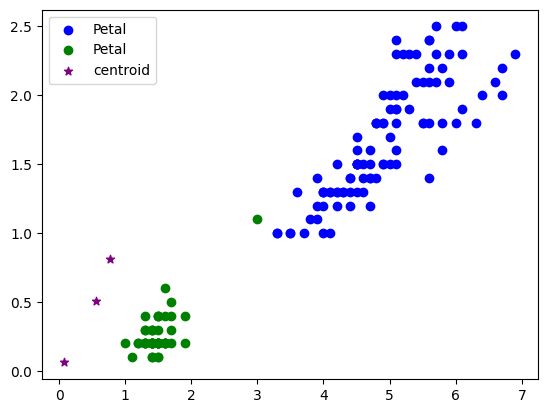

In [52]:
plt.scatter(df1['petal length (cm)'],df1['petal width (cm)'],color='blue', label='Petal')
plt.scatter(df2['petal length (cm)'],df2['petal width (cm)'],color='green', label = 'Petal')
plt.scatter(k_means2.cluster_centers_[:,0], k_means2.cluster_centers_[:, 1], color = 'purple', marker = '*', label = 'centroid')

plt.legend()

In [91]:
k_means2 = KMeans(n_clusters=3)
k_out2 = k_means2.fit_predict(df[['petal length (cm)', 'petal width (cm)']])
k_out2

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 1, 2, 2, 1, 1, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [92]:
df['cluster2'] = k_out2

In [93]:
df

,petal length (cm),petal width (cm),cluster2
0,1.4,0.2,0
1,1.4,0.2,0
2,1.3,0.2,0
3,1.5,0.2,0
4,1.4,0.2,0
...,...,...,...
145,5.2,2.3,2
146,5.0,1.9,2
147,5.2,2.0,2
148,5.4,2.3,2


In [56]:
k_means2.cluster_centers_

array([[0.7740113 , 0.81510417],
       [0.07830508, 0.06083333],
       [0.55867014, 0.51041667]])

In [58]:
df1 = df[df.cluster2==0]
df2 = df[df.cluster2==1]
df3 = df[df.cluster2==2]

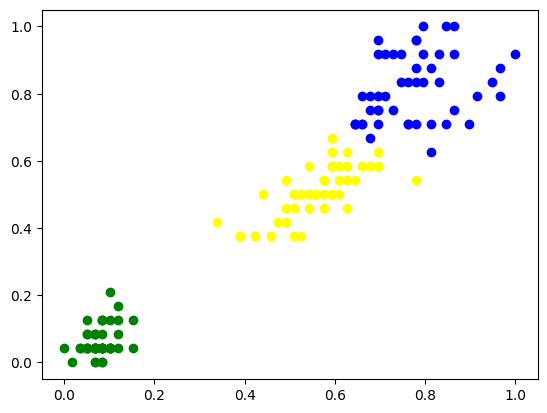

In [59]:
plt.scatter(df1['petal length (cm)'],df1['petal width (cm)'],color='blue')
plt.scatter(df2['petal length (cm)'],df2['petal width (cm)'],color='green')
plt.scatter(df3['petal length (cm)'],df3['petal width (cm)'],color='yellow')

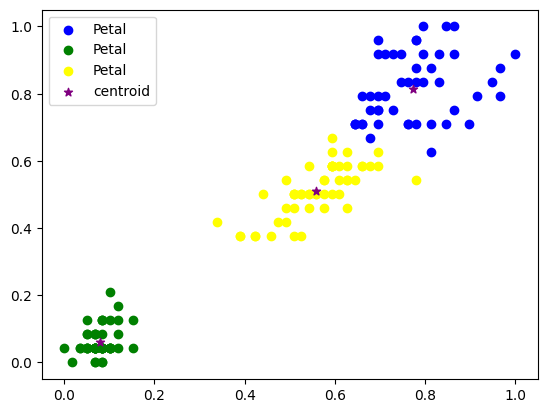

In [60]:
plt.scatter(df1['petal length (cm)'],df1['petal width (cm)'],color='blue', label = 'Petal')
plt.scatter(df2['petal length (cm)'],df2['petal width (cm)'],color='green', label = 'Petal')
plt.scatter(df3['petal length (cm)'],df3['petal width (cm)'],color='yellow', label = 'Petal')
plt.scatter(k_means2.cluster_centers_[:,0], k_means2.cluster_centers_[:, 1], color = 'purple', marker = '*', label = 'centroid')

plt.legend()

In [101]:
k_range = range(1,10)
sse = []
for k in k_range:
    k_means = KMeans(n_clusters=k)
    k_means.fit(df)
    sse.append(k_means.inertia_)

In [102]:
sse

[646.7886666666666,
 111.99687462863935,
 31.412885668276978,
 23.405584563584565,
 14.215412450294803,
 11.66556862745098,
 11.816489081094343,
 9.44871052631579,
 7.577940641342177]

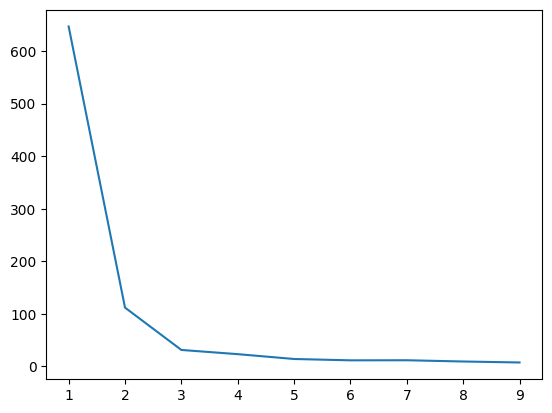

In [103]:
plt.plot(k_range, sse)

In [97]:
df

,petal length (cm),petal width (cm),cluster2
0,1.4,0.2,0
1,1.4,0.2,0
2,1.3,0.2,0
3,1.5,0.2,0
4,1.4,0.2,0
...,...,...,...
145,5.2,2.3,2
146,5.0,1.9,2
147,5.2,2.0,2
148,5.4,2.3,2
